In [1]:
import copy
import random

import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models, callbacks

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255, X_test / 255

X_train = X_train.reshape((60000, 28 ,28, 1))
X_test = X_test.reshape((10000, 28 ,28, 1))

# 과적합시 멈춤
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,   # 개선으로 간주되는 최소 변경 크기. 이 값만큼 개선이 없으면 Early Stopping 대상이 됩니다.
    patience=10,          # Early Stopping이 실제로 학습을 중지하기 전에 몇 epoch를 기다릴지를 의미합니다.
    restore_best_weights=True, # Early Stopping시 이전에 찾은 최적의 가중치값으로 복원합니다.
)

In [3]:
def mnist(learning_late, epochs, batch_size, dense_unit):
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                      padding='same', activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(padding='same'),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(dense_unit, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_late), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

    hist = model.fit(X_train, y_train, epochs=epochs, verbose = 0, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=[early_stopping])

    return model.evaluate(X_test, y_test)[1], hist.epoch[-1]+1

In [4]:
# m = mnist(0.005, 15, 1000, 512)

In [5]:
mutate = 0.01
# learning_late, epochs, batch_size, dense_unit
gene_max = [0.1, 200, 2000, 2048]
gene_min = [0.0001, 5, 20, 64]

In [6]:
def crossing(p1, p2):
    s = random.randint(1,len(p1)-1)
    e = random.randint(s,len(p1)-1)

    c = p1[:s] + p2[s:e] + p1[e:]
    return c

In [7]:
def mutating(c):
    for i in range(len(c)):
        if random.random() < mutate:
            c[i] = random.random() * (gene_max[i] - gene_min[i]) + gene_min[i]
            if i != 0:
                c[i] = int(c[i])
    return c

In [8]:
genes = []
for i in range(20):
    genes.append([1,[random.random() * (gene_max[i] - gene_min[i]) + gene_min[i] for i in range(len(gene_max))],0])
    for j in range(1,4):
        genes[i][1][j] = int(genes[i][1][j])
print(genes)

[[1, [0.005918768614024312, 91, 1215, 504], 0], [1, [0.08899310561111018, 82, 1288, 345], 0], [1, [0.004018002144801006, 53, 654, 526], 0], [1, [0.055153965342917374, 12, 991, 1133], 0], [1, [0.05940534109687956, 168, 886, 704], 0], [1, [0.000526863654699342, 185, 254, 1871], 0], [1, [0.029153090177471756, 126, 1176, 1185], 0], [1, [0.06885518753150363, 107, 214, 2045], 0], [1, [0.08330878208405078, 156, 1922, 1537], 0], [1, [0.004785808299668158, 161, 737, 1619], 0], [1, [0.09334797419688572, 46, 1123, 1503], 0], [1, [0.05057717744007653, 71, 89, 1727], 0], [1, [0.05260311886874142, 103, 1061, 291], 0], [1, [0.034233969229810014, 77, 1665, 1789], 0], [1, [0.0012132855817827157, 100, 375, 1382], 0], [1, [0.0010765058666750184, 118, 1756, 742], 0], [1, [0.00977424603166115, 114, 1797, 1761], 0], [1, [0.08713915679449337, 161, 1364, 1956], 0], [1, [0.0207701789863383, 122, 1377, 1953], 0], [1, [0.09382895382380388, 116, 1254, 223], 0]]


In [9]:
import time

result = []

for i in range(50):
    genes.sort(key=lambda x: x[2], reverse=True)
    for j in range(5):
        start = time.time()
        p1 = genes[random.randint(0, 10)][1]
        p2 = genes[random.randint(0, 10)][1]
        child = crossing(p1, p2)
        child = mutating(child)
        acc, ep = mnist(child[0], child[1], child[2], child[3])
        child[1] = ep
        print(f"gen {i} {child}: {acc} - {time.time()-start:.3f} sec")
        genes.append([0, child, acc])
    genes.sort(key=lambda x: x[0], reverse=True)
    for j in range(5):
        genes.pop(0)
    for j in range(20):
        genes[j][0] += 1
    print(genes)
    genes_result = genes.copy()
    result.append(genes_result)

2022-12-28 15:44:18.927933: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-28 15:44:18.948993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-28 15:44:18.949094: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-28 15:44:18.949343: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

313/313 [==============================] - 0s 914us/step - loss: 2.3018 - accuracy: 0.1135
gen 0 [0.05940534109687956, 13, 254, 704]: 0.11349999904632568 - 15.054 sec
313/313 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9923
gen 0 [0.005918768614024312, 17, 1215, 504]: 0.9922999739646912 - 9.448 sec
313/313 [==============================] - 0s 885us/step - loss: 0.0226 - accuracy: 0.9921
gen 0 [0.000526863654699342, 24, 254, 1871]: 0.9921000003814697 - 22.913 sec
313/313 [==============================] - 0s 919us/step - loss: 0.0197 - accuracy: 0.9927
gen 0 [0.004018002144801006, 17, 654, 526]: 0.9926999807357788 - 10.761 sec
313/313 [==============================] - 0s 871us/step - loss: 0.0480 - accuracy: 0.9837
gen 0 [0.029153090177471756, 17, 1176, 1185]: 0.9836999773979187 - 9.804 sec
[[2, [0.000526863654699342, 185, 254, 1871], 0], [2, [0.029153090177471756, 126, 1176, 1185], 0], [2, [0.06885518753150363, 107, 214, 2045], 0], [2, [0.0833087820840

In [10]:
import matplotlib.pyplot as plt

In [11]:
print(result)

[[[2, [0.000526863654699342, 185, 254, 1871], 0], [2, [0.029153090177471756, 126, 1176, 1185], 0], [2, [0.06885518753150363, 107, 214, 2045], 0], [2, [0.08330878208405078, 156, 1922, 1537], 0], [2, [0.004785808299668158, 161, 737, 1619], 0], [3, [0.09334797419688572, 46, 1123, 1503], 0], [3, [0.05057717744007653, 71, 89, 1727], 0], [3, [0.05260311886874142, 103, 1061, 291], 0], [3, [0.034233969229810014, 77, 1665, 1789], 0], [3, [0.0012132855817827157, 100, 375, 1382], 0], [4, [0.0010765058666750184, 118, 1756, 742], 0], [4, [0.00977424603166115, 114, 1797, 1761], 0], [4, [0.08713915679449337, 161, 1364, 1956], 0], [4, [0.0207701789863383, 122, 1377, 1953], 0], [4, [0.09382895382380388, 116, 1254, 223], 0], [4, [0.05940534109687956, 13, 254, 704], 0.11349999904632568], [4, [0.005918768614024312, 17, 1215, 504], 0.9922999739646912], [4, [0.000526863654699342, 24, 254, 1871], 0.9921000003814697], [4, [0.004018002144801006, 17, 654, 526], 0.9926999807357788], [4, [0.029153090177471756, 17

gen 0: [[2, [0.000526863654699342, 185, 254, 1871], 0], [2, [0.029153090177471756, 126, 1176, 1185], 0], [2, [0.06885518753150363, 107, 214, 2045], 0], [2, [0.08330878208405078, 156, 1922, 1537], 0], [2, [0.004785808299668158, 161, 737, 1619], 0], [3, [0.09334797419688572, 46, 1123, 1503], 0], [3, [0.05057717744007653, 71, 89, 1727], 0], [3, [0.05260311886874142, 103, 1061, 291], 0], [3, [0.034233969229810014, 77, 1665, 1789], 0], [3, [0.0012132855817827157, 100, 375, 1382], 0], [4, [0.0010765058666750184, 118, 1756, 742], 0], [4, [0.00977424603166115, 114, 1797, 1761], 0], [4, [0.08713915679449337, 161, 1364, 1956], 0], [4, [0.0207701789863383, 122, 1377, 1953], 0], [4, [0.09382895382380388, 116, 1254, 223], 0], [4, [0.05940534109687956, 13, 254, 704], 0.11349999904632568], [4, [0.005918768614024312, 17, 1215, 504], 0.9922999739646912], [4, [0.000526863654699342, 24, 254, 1871], 0.9921000003814697], [4, [0.004018002144801006, 17, 654, 526], 0.9926999807357788], [4, [0.0291530901774717

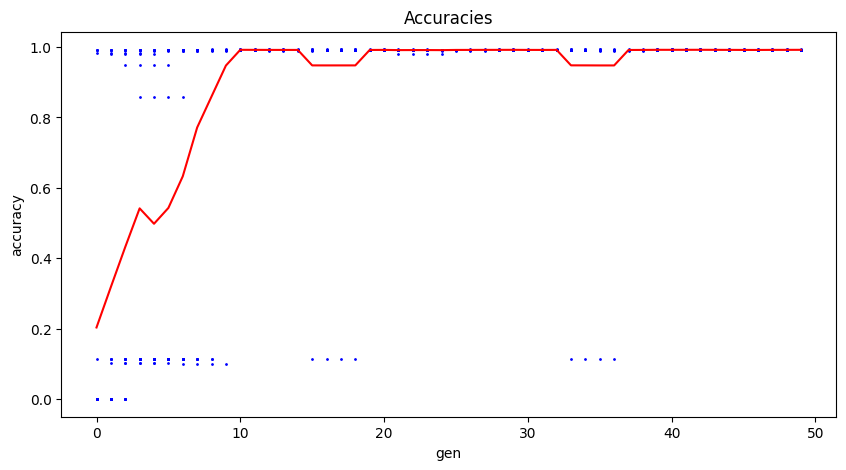

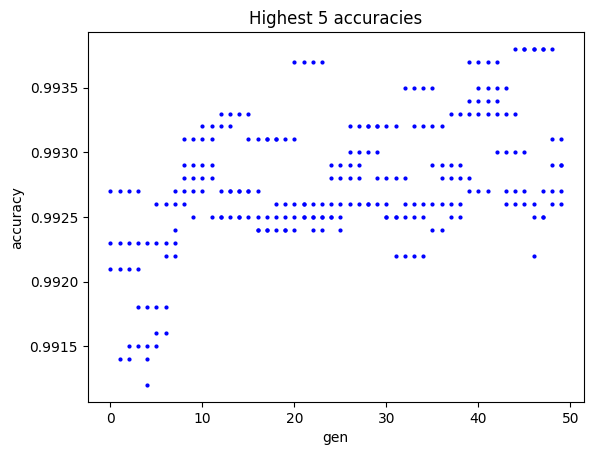

In [33]:
gene_means = []
plt.figure(figsize=(10, 5))
for i, gen in enumerate(result):
    mean = 0
    print(f"gen {i}: {gen}")
    for  gene in gen:
        plt.plot(i, gene[2], 'bo', markersize=1)
        mean += gene[2]
    mean /= len(gen)
    print(mean)
    gene_means.append(mean)
plt.title("Accuracies")
plt.plot([i for i in range(50)], gene_means, 'r')
plt.xlabel('gen')
plt.ylabel('accuracy')
plt.show()

for i, gen in enumerate(result):
    g = gen.copy()
    g.sort(key=lambda x: x[2], reverse=True)
    for j in range(5):
        if(g[j][2]> 0.99):
            plt.plot(i, g[j][2], 'bo', markersize=2)
plt.xlabel('gen')
plt.title("Highest 5 accuracies")
plt.ylabel('accuracy')
plt.show()

In [21]:
len(gene_means)

50

In [20]:
)

SyntaxError: unmatched ')' (687023194.py, line 1)